In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [ ]:
df = pd.read_csv(r"bank-full.csv", delimiter=';')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA process

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
df.shape

(45211, 17)

In [ ]:
df.duplicated().value_counts()

False    45211
dtype: int64

In [ ]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


<ipython-input-25-91d5444f4038>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'balance'),
  Text(2.5, 0, 'day'),
  Text(3.5, 0, 'duration'),
  Text(4.5, 0, 'campaign'),
  Text(5.5, 0, 'pdays'),
  Text(6.5, 0, 'previous')])

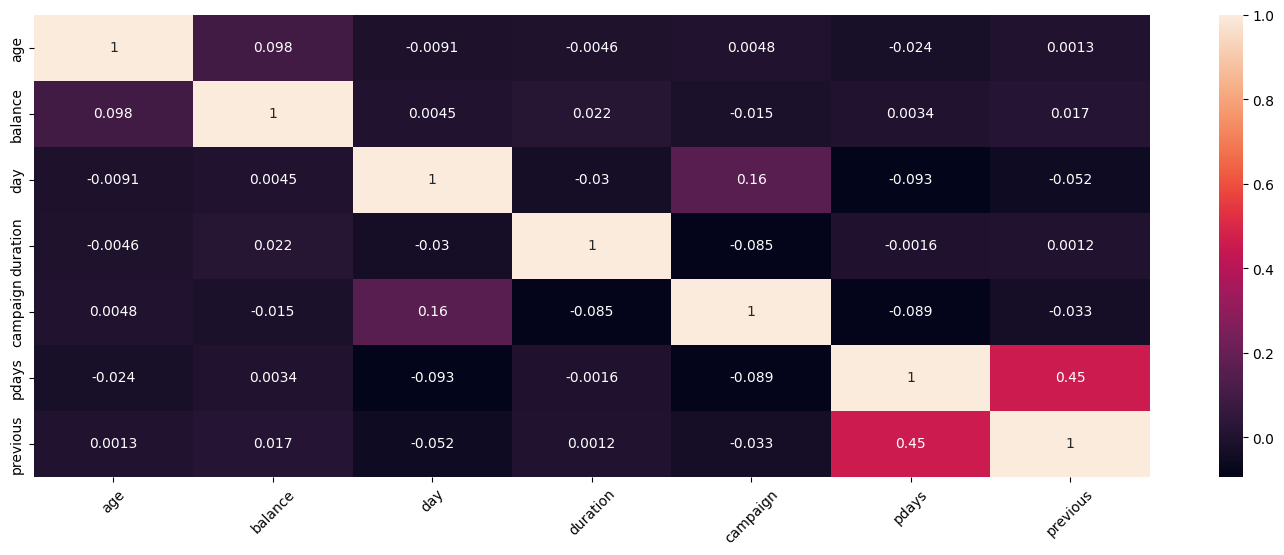

In [ ]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45)

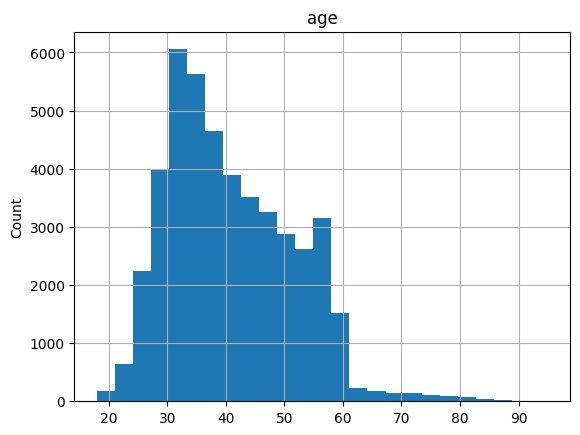

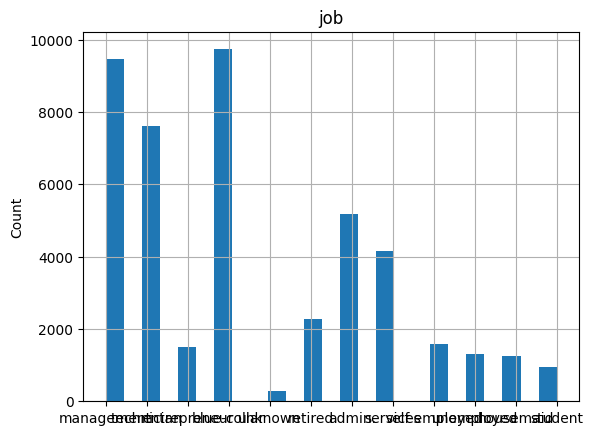

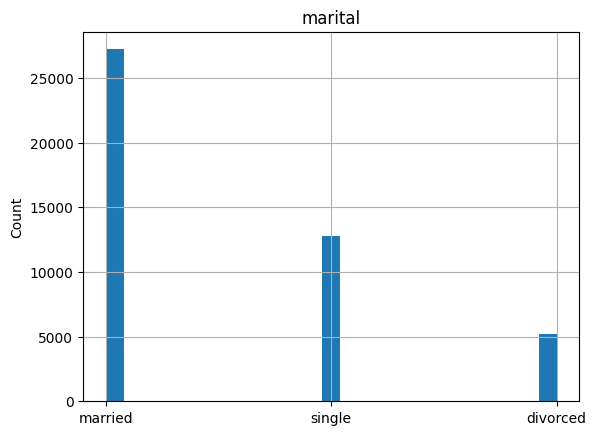

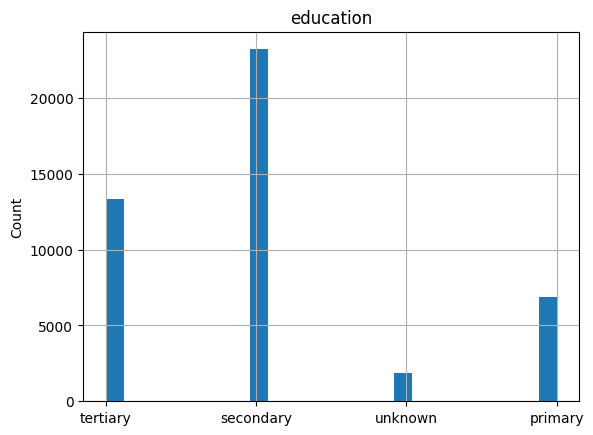

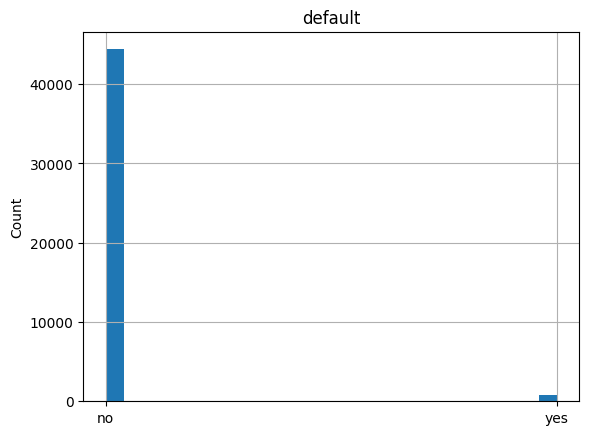

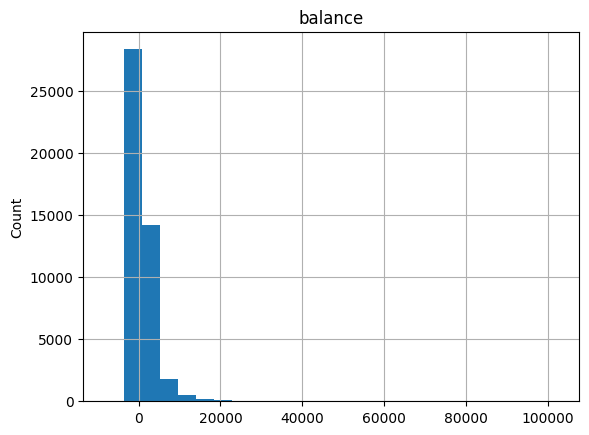

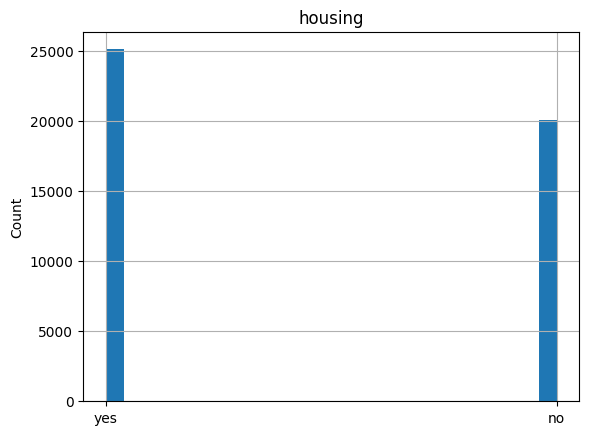

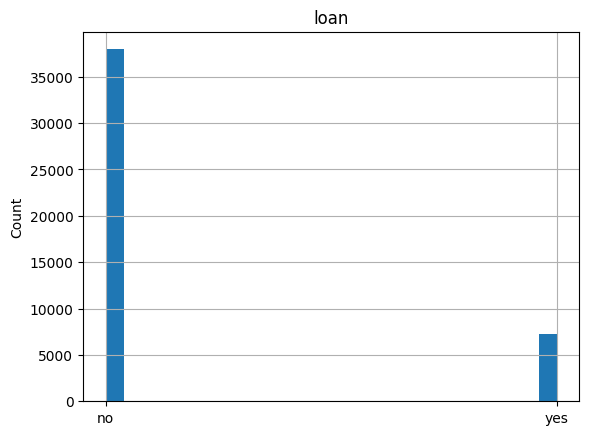

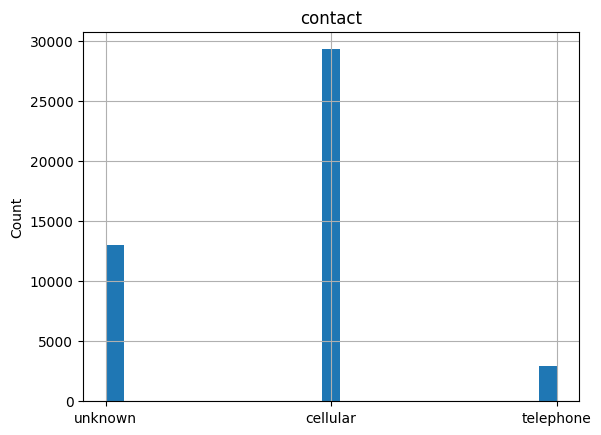

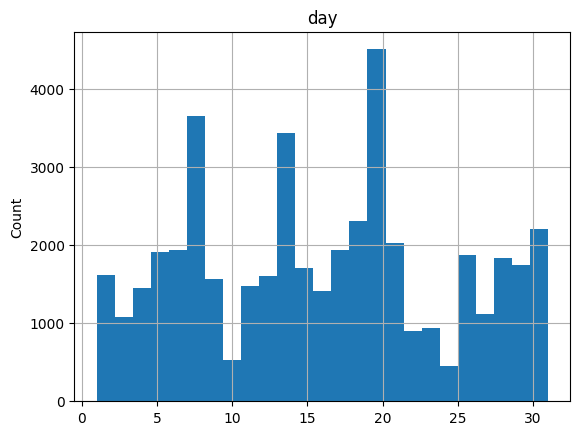

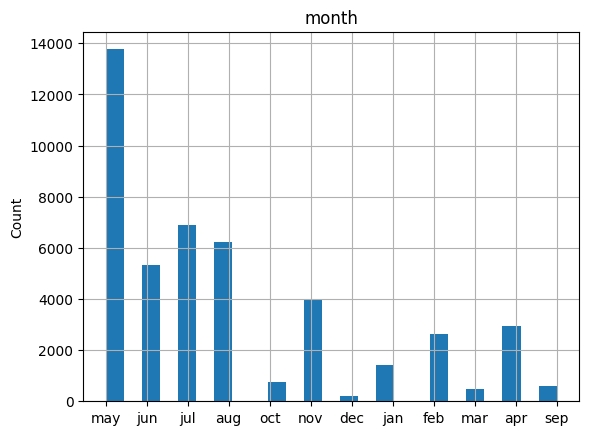

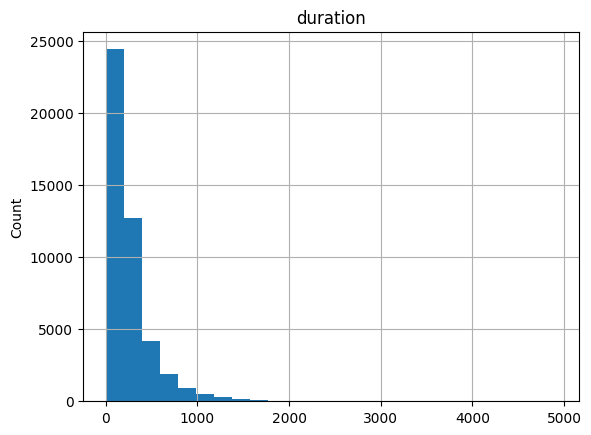

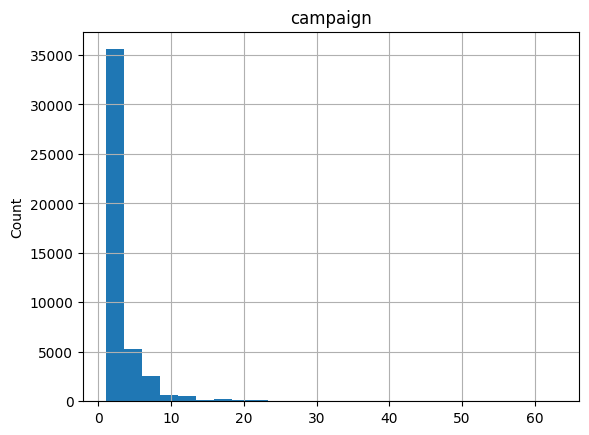

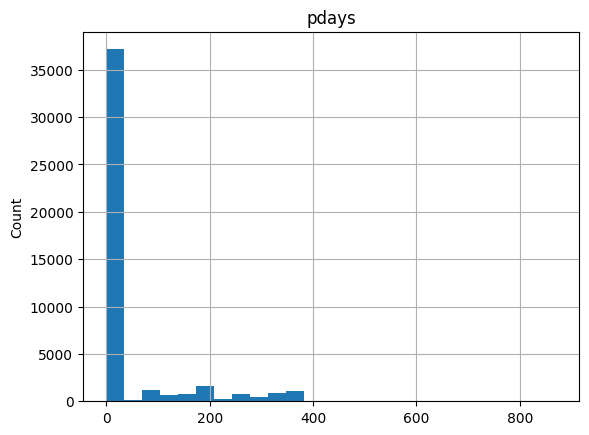

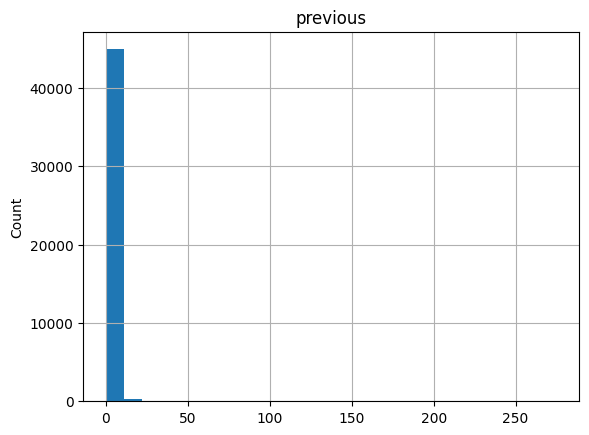

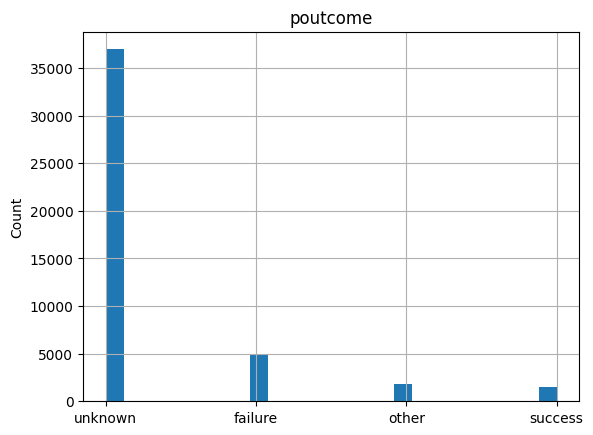

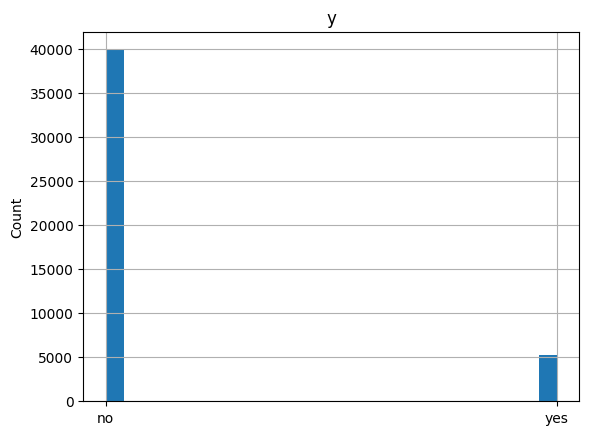

In [ ]:
# visualisation

for feature in df:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

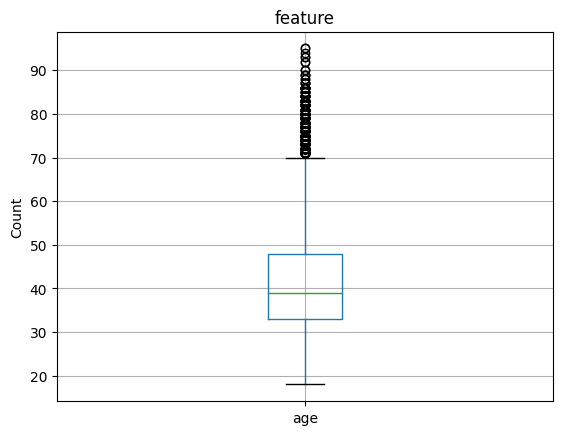

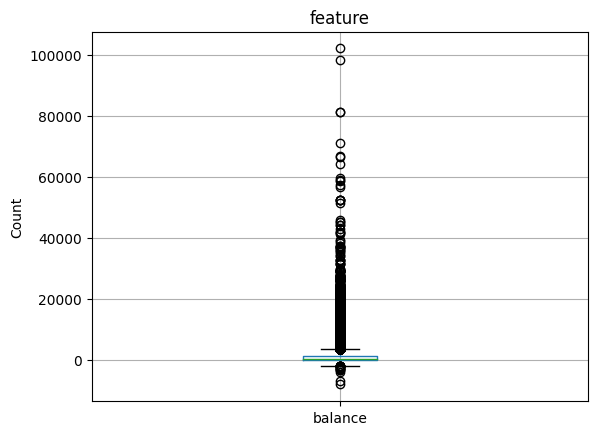

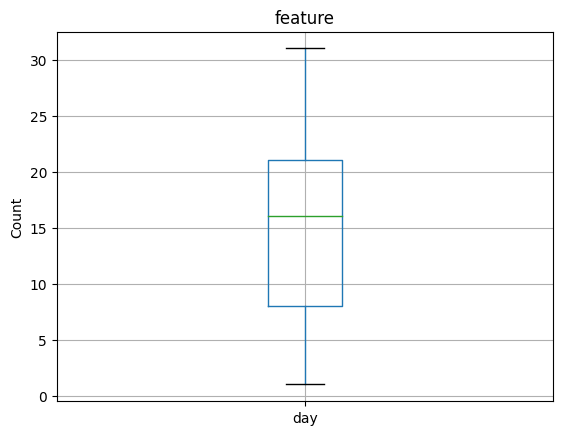

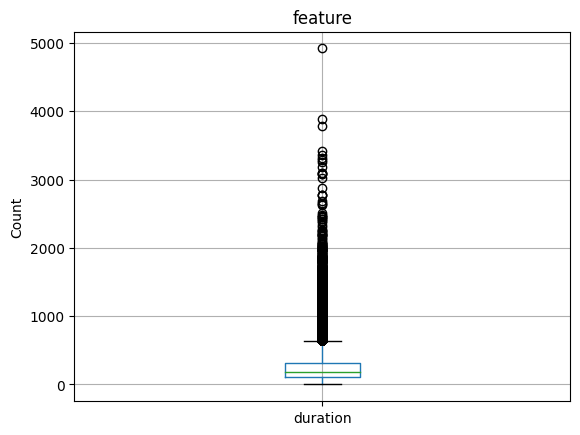

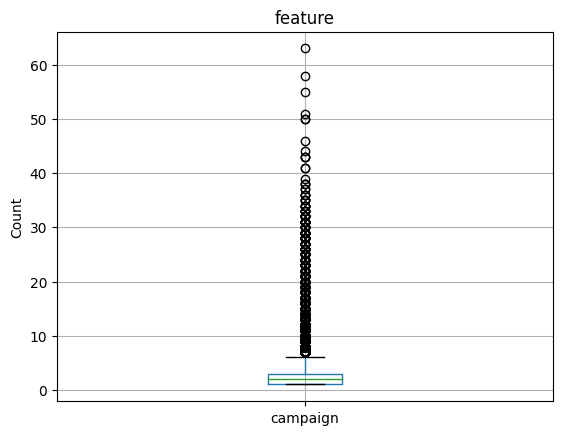

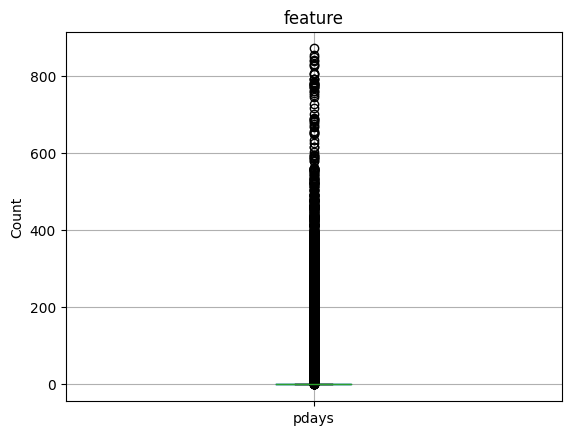

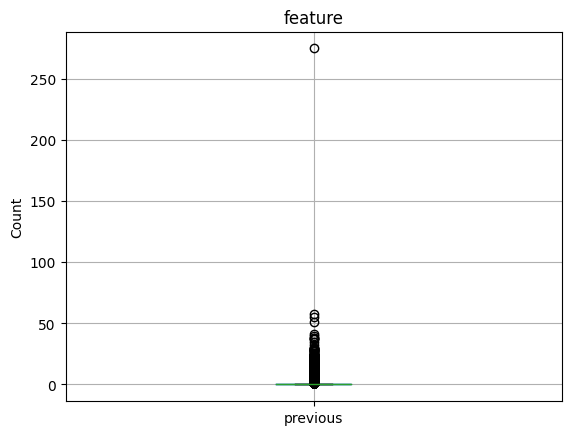

In [ ]:
df1 = df[['age','balance','day','duration','campaign','pdays','previous']]
for feature in df1:
    data=df.copy()
    data.boxplot(column = feature)
    plt.ylabel('Count')
    plt.title('feature')
    plt.show()

# Categorical features

In [ ]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
df[categorical_features].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [ ]:
print(df['job'].value_counts())
print(df['marital'].value_counts())
print(df['education'].value_counts())
print(df['default'].value_counts())
print(df['housing'].value_counts())
print(df['loan'].value_counts())
print(df['contact'].value_counts())
print(df['month'].value_counts())
print(df['poutcome'].value_counts())
print(df['y'].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [ ]:
# getting dummies
df = pd.get_dummies(df, columns = ['marital','education','housing','contact','poutcome','loan','default'])

In [ ]:
df

,age,job,balance,day,month,duration,campaign,pdays,previous,y,...,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,loan_no,loan_yes,default_no,default_yes
0,58,management,2143,5,may,261,1,-1,0,no,...,0,1,0,0,0,1,1,0,1,0
1,44,technician,29,5,may,151,1,-1,0,no,...,0,1,0,0,0,1,1,0,1,0
2,33,entrepreneur,2,5,may,76,1,-1,0,no,...,0,1,0,0,0,1,0,1,1,0
3,47,blue-collar,1506,5,may,92,1,-1,0,no,...,0,1,0,0,0,1,1,0,1,0
4,33,unknown,1,5,may,198,1,-1,0,no,...,0,1,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,825,17,nov,977,3,-1,0,yes,...,0,0,0,0,0,1,1,0,1,0
45207,71,retired,1729,17,nov,456,2,-1,0,yes,...,0,0,0,0,0,1,1,0,1,0
45208,72,retired,5715,17,nov,1127,5,184,3,yes,...,0,0,0,0,1,0,1,0,1,0
45209,57,blue-collar,668,17,nov,508,4,-1,0,no,...,1,0,0,0,0,1,1,0,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df[['job','month','y']] = df[['job','month','y']].apply(l.fit_transform)

In [ ]:
df

,age,job,balance,day,month,duration,campaign,pdays,previous,y,...,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,loan_no,loan_yes,default_no,default_yes
0,58,4,2143,5,8,261,1,-1,0,0,...,0,1,0,0,0,1,1,0,1,0
1,44,9,29,5,8,151,1,-1,0,0,...,0,1,0,0,0,1,1,0,1,0
2,33,2,2,5,8,76,1,-1,0,0,...,0,1,0,0,0,1,0,1,1,0
3,47,1,1506,5,8,92,1,-1,0,0,...,0,1,0,0,0,1,1,0,1,0
4,33,11,1,5,8,198,1,-1,0,0,...,0,1,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,825,17,9,977,3,-1,0,1,...,0,0,0,0,0,1,1,0,1,0
45207,71,5,1729,17,9,456,2,-1,0,1,...,0,0,0,0,0,1,1,0,1,0
45208,72,5,5715,17,9,1127,5,184,3,1,...,0,0,0,0,1,0,1,0,1,0
45209,57,1,668,17,9,508,4,-1,0,0,...,1,0,0,0,0,1,1,0,1,0


In [ ]:
df.corr()

,age,job,balance,day,month,duration,campaign,pdays,previous,y,...,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,loan_no,loan_yes,default_no,default_yes
age,1.000000,-0.021868,0.097783,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.025155,...,0.170349,-0.020132,-0.004927,-0.022967,0.035526,-0.000816,0.015655,-0.015655,0.017879,-0.017879
job,-0.021868,1.000000,0.018232,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.040438,...,-0.002573,-0.080668,-0.015417,-0.003597,0.027324,0.001535,0.033004,-0.033004,0.006853,-0.006853
balance,0.097783,0.018232,1.000000,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,0.052838,...,0.037999,-0.037331,0.011857,0.008466,0.035240,-0.030271,0.084350,-0.084350,0.066745,-0.066745
day,-0.009120,0.022856,0.004503,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,-0.028348,...,0.023652,-0.034103,-0.068700,-0.032952,-0.030321,0.086256,-0.011370,0.011370,-0.009424,0.009424
month,-0.042357,-0.092870,0.019777,-0.006028,1.000000,0.006314,-0.110031,0.033065,0.022727,-0.024471,...,-0.004616,0.359322,0.031249,0.005385,0.007806,-0.031538,-0.022145,0.022145,-0.011486,0.011486
duration,-0.004648,0.004744,0.021560,-0.030206,0.006314,1.000000,-0.084570,-0.001565,0.001203,0.394521,...,-0.023201,-0.014379,-0.018925,-0.001958,0.042389,-0.003491,0.012412,-0.012412,0.010021,-0.010021
campaign,0.004760,0.006839,-0.014578,0.162490,-0.110031,-0.084570,1.000000,-0.088628,-0.032855,-0.073172,...,0.053895,0.004853,-0.088131,-0.020107,-0.057486,0.107965,-0.009980,0.009980,-0.016822,0.016822
pdays,-0.023758,-0.024455,0.003435,-0.093044,0.033065,-0.001565,-0.088628,1.000000,0.454820,0.103621,...,0.016006,-0.247068,0.701052,0.389791,0.228539,-0.869962,0.022754,-0.022754,0.029979,-0.029979
previous,0.001288,-0.000911,0.016674,-0.051710,0.022727,0.001203,-0.032855,0.454820,1.000000,0.093236,...,0.028097,-0.154162,0.350627,0.306615,0.201424,-0.532763,0.011043,-0.011043,0.018329,-0.018329
y,0.025155,0.040438,0.052838,-0.028348,-0.024471,0.394521,-0.073172,0.103621,0.093236,1.000000,...,0.014042,-0.150935,0.009885,0.031955,0.306788,-0.167051,0.068185,-0.068185,0.022419,-0.022419


In [ ]:
X = df.drop('y', axis = 1)
y = df['y']

In [ ]:
# model building
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# y prediction
y_pred = model.predict(X_test)

In [ ]:
y_pred_ = pd.DataFrame({'actual':y_test, 'predicted':y_pred})
y_pred_

,actual,predicted
14001,0,0
32046,1,1
13318,0,0
42991,0,0
14237,0,0
...,...,...
2666,0,0
35730,0,0
11495,0,0
20975,0,0


In [ ]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[11726,   243],
       [ 1319,   276]])

In [ ]:
# classification report
from sklearn.metrics import classification_report
clf_rep = classification_report(y_test, y_pred)
clf_rep

'              precision    recall  f1-score   support\n\n           0       0.90      0.98      0.94     11969\n           1       0.53      0.17      0.26      1595\n\n    accuracy                           0.88     13564\n   macro avg       0.72      0.58      0.60     13564\nweighted avg       0.86      0.88      0.86     13564\n'

In [ ]:
prob = model.predict_proba(X_test)
prob1 = prob[:,1]
prob1


array([0.01739801, 0.81368214, 0.07277222, ..., 0.0651586 , 0.1380168 ,
       0.27929782])

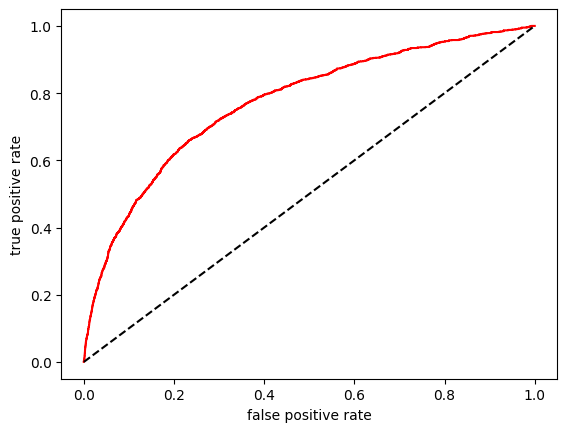

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,threshold = roc_curve(y_test, prob1)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,color = 'red', label = "logit model")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.8848422294308463